# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt 

# Reading the BFI Dataset

In [2]:
df = pd.read_csv('data-final.csv', delimiter="\t")

In [3]:
columns = df.columns
for column in columns:
 print(column)


EXT1
EXT2
EXT3
EXT4
EXT5
EXT6
EXT7
EXT8
EXT9
EXT10
EST1
EST2
EST3
EST4
EST5
EST6
EST7
EST8
EST9
EST10
AGR1
AGR2
AGR3
AGR4
AGR5
AGR6
AGR7
AGR8
AGR9
AGR10
CSN1
CSN2
CSN3
CSN4
CSN5
CSN6
CSN7
CSN8
CSN9
CSN10
OPN1
OPN2
OPN3
OPN4
OPN5
OPN6
OPN7
OPN8
OPN9
OPN10
EXT1_E
EXT2_E
EXT3_E
EXT4_E
EXT5_E
EXT6_E
EXT7_E
EXT8_E
EXT9_E
EXT10_E
EST1_E
EST2_E
EST3_E
EST4_E
EST5_E
EST6_E
EST7_E
EST8_E
EST9_E
EST10_E
AGR1_E
AGR2_E
AGR3_E
AGR4_E
AGR5_E
AGR6_E
AGR7_E
AGR8_E
AGR9_E
AGR10_E
CSN1_E
CSN2_E
CSN3_E
CSN4_E
CSN5_E
CSN6_E
CSN7_E
CSN8_E
CSN9_E
CSN10_E
OPN1_E
OPN2_E
OPN3_E
OPN4_E
OPN5_E
OPN6_E
OPN7_E
OPN8_E
OPN9_E
OPN10_E
dateload
screenw
screenh
introelapse
testelapse
endelapse
IPC
country
lat_appx_lots_of_err
long_appx_lots_of_err


# Pre-processing

In [4]:
X = df[df.columns[0:50]]
pd.set_option('display.max_columns', None)
X = X.fillna(0)
X

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,3.0,2.0,4.0,3.0,5.0,4.0,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


# ML Model

In [5]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=10, random_state=0, batch_size=100, max_iter=100).fit(X)
len(kmeans.cluster_centers_)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


10

In [6]:
#Naming the personality types
one = kmeans.cluster_centers_[0]
two = kmeans.cluster_centers_[1]
three =kmeans.cluster_centers_[2]
four = kmeans.cluster_centers_[3]
five =kmeans.cluster_centers_[4]
six = kmeans.cluster_centers_[5]
seven = kmeans.cluster_centers_[6]
eight = kmeans.cluster_centers_[7]
nine= kmeans.cluster_centers_[8]
ten = kmeans.cluster_centers_[9]

In [7]:
#Calculating personality type 1 score
one 

one_scores = {}
one_scores['extroversion_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] - one[9]
one_scores['neuroticism_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] + one[5] + one[6] + one[7] + one[8] + one[9]
one_scores['agreeableness_score'] =  -one[0] + one[1] - one[2] + one[3] - one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['conscientiousness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] - one[7] + one[8] + one[9]
one_scores['openness_score'] =  one[0] - one[1] + one[2] - one[3] + one[4] - one[5] + one[6] + one[7] + one[8] + one[9]

In [8]:
#all personality type scores


#dictionary of personality type and each trait scores
all_types = {'one':one, 'two': two, 'three' :three, 'four':four, 'five':five, 'six': six, 'seven': seven, 'eight': eight,
             'nine': nine, 'ten': ten}

all_types_scores ={}

for name, personality_type in all_types.items():
    personality_trait = {}

    personality_trait['extroversion_score'] =  personality_type[0] - personality_type[1] +personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] - personality_type[7] + personality_type[8] -personality_type[9]
    personality_trait['neuroticism_score'] =  personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] + personality_type[4] + personality_type[5] + personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['agreeableness_score'] =  -personality_type[0] +personality_type[1] - personality_type[2] + personality_type[3] - personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['conscientiousness_score'] = personality_type[0] - personality_type[1] + personality_type[2] -personality_type[3] +personality_type[4] - personality_type[5] +personality_type[6] -personality_type[7] + personality_type[8] + personality_type[9]
    personality_trait['openness_score'] =  personality_type[0] -personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] +personality_type[6] + personality_type[7] + personality_type[8] + personality_type[9]
    
    all_types_scores[name] = personality_trait

In [9]:
all_types_scores

{'one': {'extroversion_score': -7.008256313845145,
  'neuroticism_score': 15.281161668616864,
  'agreeableness_score': 1.982790581491693,
  'conscientiousness_score': 1.4643256248110226,
  'openness_score': 9.367826669997259},
 'two': {'extroversion_score': -10.229991474595797,
  'neuroticism_score': 13.391061786745253,
  'agreeableness_score': 3.0909675585934147,
  'conscientiousness_score': -1.2840604854993192,
  'openness_score': 6.818423847200863},
 'three': {'extroversion_score': -4.004688574464987,
  'neuroticism_score': 16.545062410135674,
  'agreeableness_score': 1.58223759611572,
  'conscientiousness_score': 4.319177311467197,
  'openness_score': 11.899414449144608},
 'four': {'extroversion_score': -3.034395315597741,
  'neuroticism_score': 17.494029231407637,
  'agreeableness_score': 0.20233759048363087,
  'conscientiousness_score': 4.839111992254154,
  'openness_score': 12.743326110009697},
 'five': {'extroversion_score': 9.752671429080795,
  'neuroticism_score': 22.83070449

### Normalizing the data

In [10]:
#making a list of all trait scores
all_extroversion = []
all_neuroticism =[]
all_agreeableness =[]
all_conscientiousness =[]
all_openness =[]

for personality_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['extroversion_score'])
    all_neuroticism.append(personality_trait['neuroticism_score'])
    all_agreeableness.append(personality_trait['agreeableness_score'])
    all_conscientiousness.append(personality_trait['conscientiousness_score'])
    all_openness.append(personality_trait['openness_score'])
    

In [11]:
#normalizing equation used 
all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))
all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))

In [12]:
all_extroversion_normalized

array([0.16999693, 0.0185651 , 0.31117419, 0.35678107, 0.95781399,
       0.67314373, 1.        , 0.        , 0.51842881, 0.60021362])

In [13]:
#assigning normalized scores to their personality type
counter = 0

normalized_all_types_scores ={}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['extroversion_score'] = all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism_score'] = all_neuroticism_normalized[counter]
    normalized_personality_trait['agreeableness_score'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness_score'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness_score'] = all_openness_normalized[counter]
    
    normalized_all_types_scores[personality_type] = normalized_personality_trait
    
    counter+=1

In [14]:
normalized_all_types_scores

{'one': {'extroversion_score': 0.1699969284178586,
  'neuroticism_score': 0.6277742622142866,
  'agreeableness_score': 0.8132588217265576,
  'conscientiousness_score': 0.18174725704475928,
  'openness_score': 0.42780056784748316},
 'two': {'extroversion_score': 0.018565100208695264,
  'neuroticism_score': 0.5420362302994013,
  'agreeableness_score': 1.0,
  'conscientiousness_score': 0.017515415406981892,
  'openness_score': 0.29658341798875265},
 'three': {'extroversion_score': 0.3111741919823864,
  'neuroticism_score': 0.6851068736561128,
  'agreeableness_score': 0.7457608155455572,
  'conscientiousness_score': 0.35234102781931614,
  'openness_score': 0.5581007816962062},
 'four': {'extroversion_score': 0.3567810698782899,
  'neuroticism_score': 0.7281535657324153,
  'agreeableness_score': 0.5132310316971305,
  'conscientiousness_score': 0.3834101086288353,
  'openness_score': 0.6015367118211288},
 'five': {'extroversion_score': 0.9578139909480959,
  'neuroticism_score': 0.97023391216

# Plotting the results

### Personality Type 1

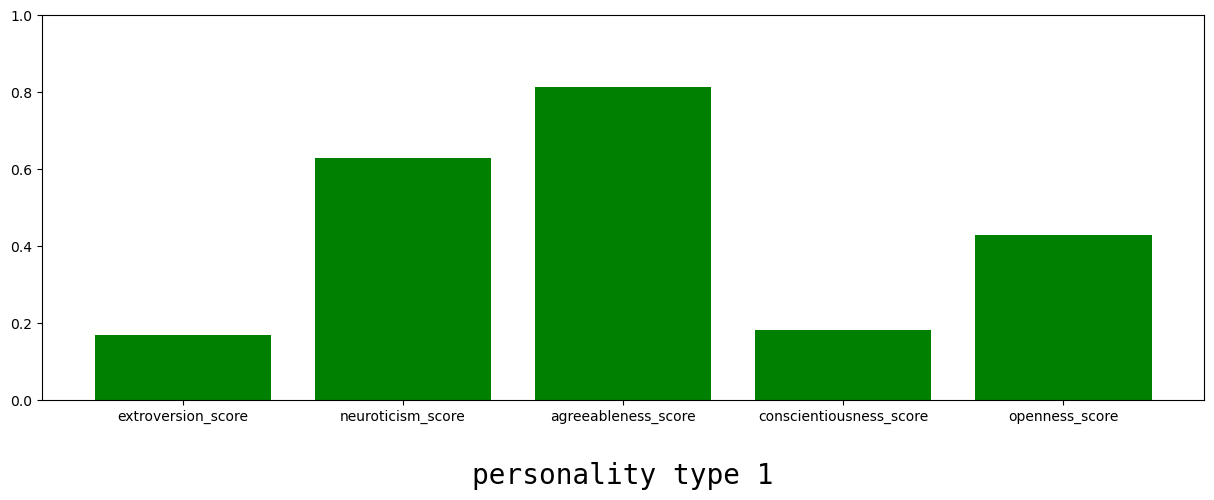

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['one'].keys()), normalized_all_types_scores['one'].values(), color='g')
font1 = {'family':'monospace','color':'black','size':20}
plt.xlabel('\npersonality type 1', fontdict=font1)
plt.savefig("personality type 1.jpg")
plt.show()

### Personality Type 2

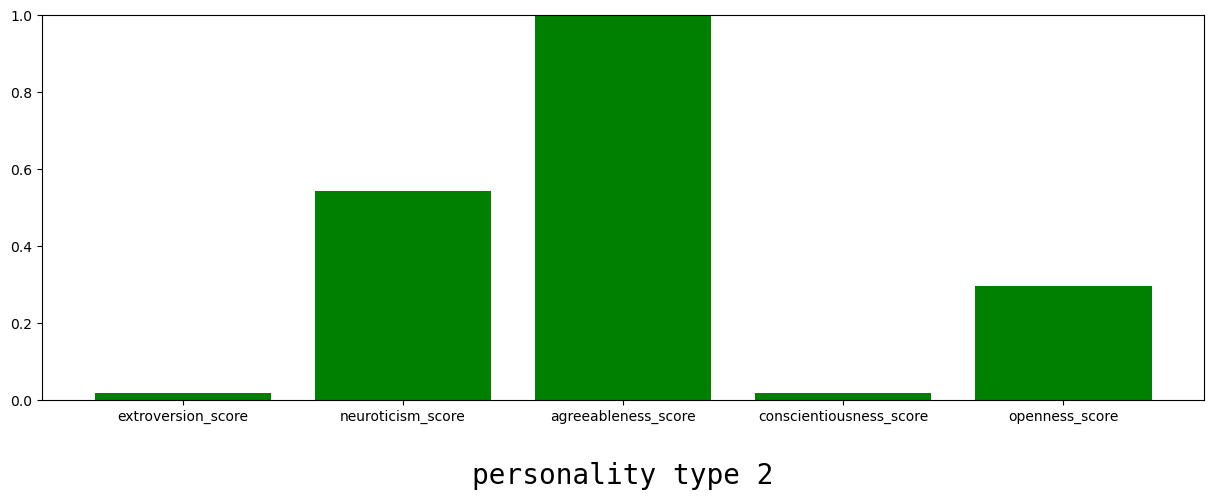

In [16]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['two'].keys()), normalized_all_types_scores['two'].values(), color='g')
plt.xlabel('\npersonality type 2', fontdict=font1)
plt.savefig("personality type 2.jpg")
plt.show()

### Personality Type 3

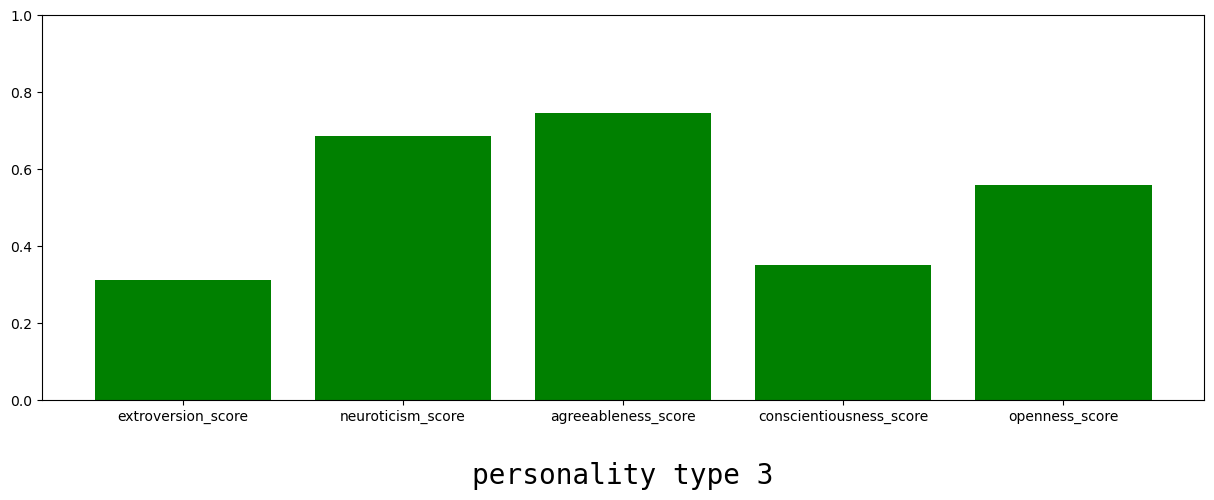

In [17]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['three'].keys()), normalized_all_types_scores['three'].values(), color='g')
plt.xlabel('\npersonality type 3', fontdict=font1)
plt.savefig("personality type 3.jpg")
plt.show()

### Personality Type 4

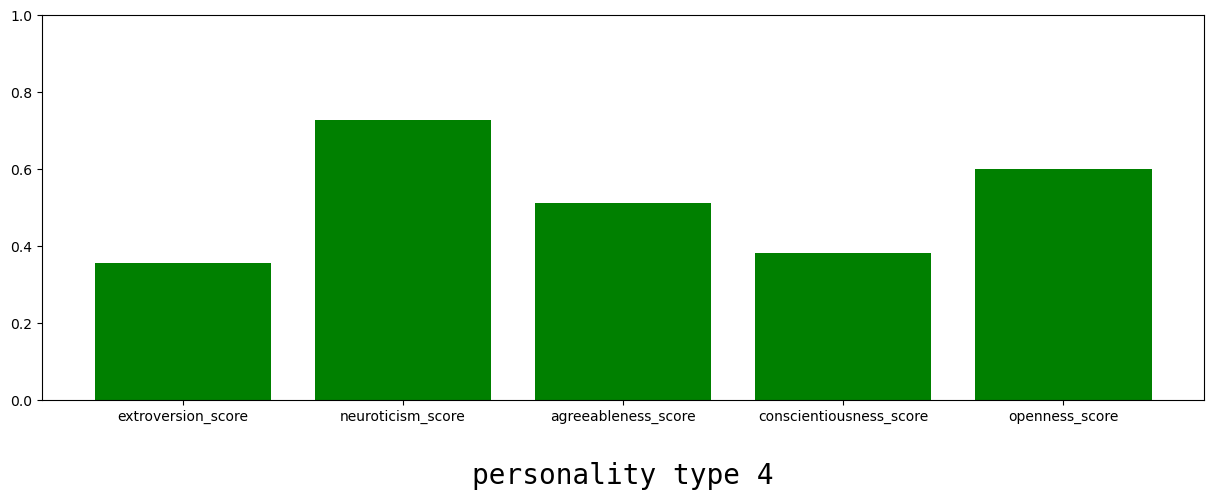

In [18]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['four'].keys()), normalized_all_types_scores['four'].values(), color='g')
plt.xlabel('\npersonality type 4', fontdict=font1)
plt.savefig("personality type 4.jpg")
plt.show()

### Personality Type 5

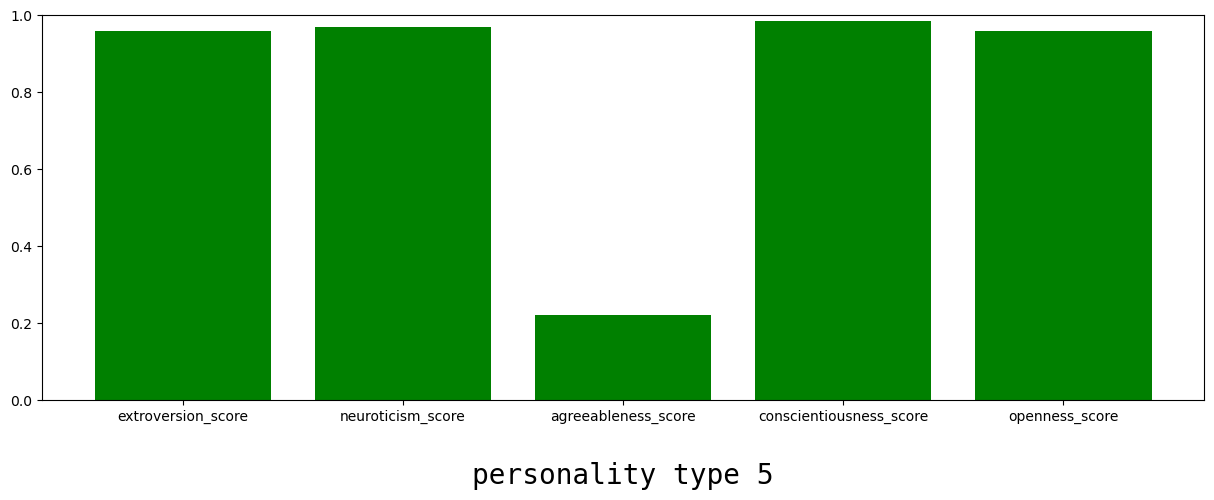

In [19]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['five'].keys()), normalized_all_types_scores['five'].values(), color='g')
plt.xlabel('\npersonality type 5', fontdict=font1)
plt.savefig("personality type 5.jpg")
plt.show()

### Personality Type 6

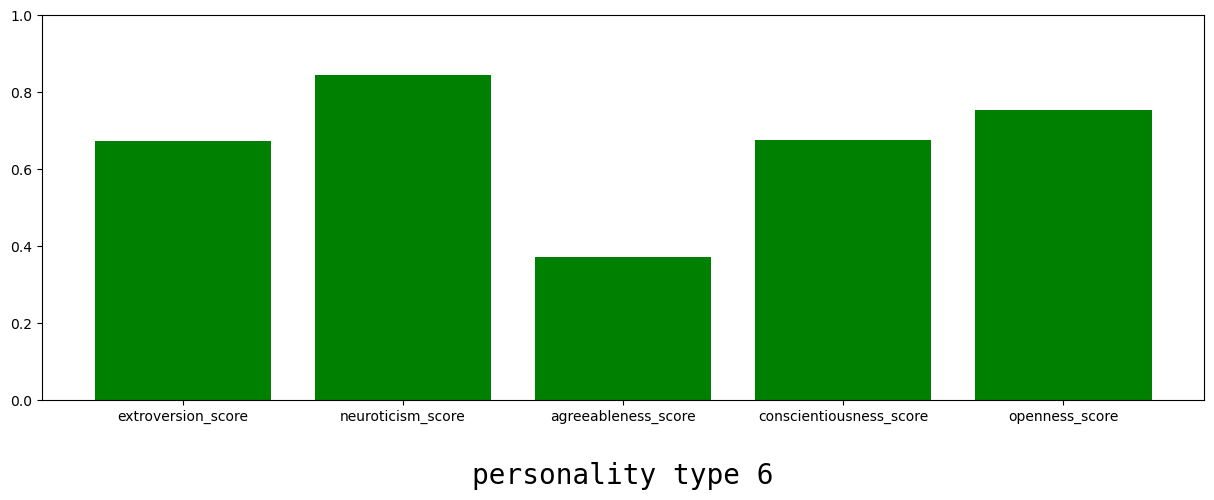

In [20]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['six'].keys()), normalized_all_types_scores['six'].values(), color='g')
plt.xlabel('\npersonality type 6', fontdict=font1)
plt.savefig("personality type 6.jpg")
plt.show()

### Personality Type 7 

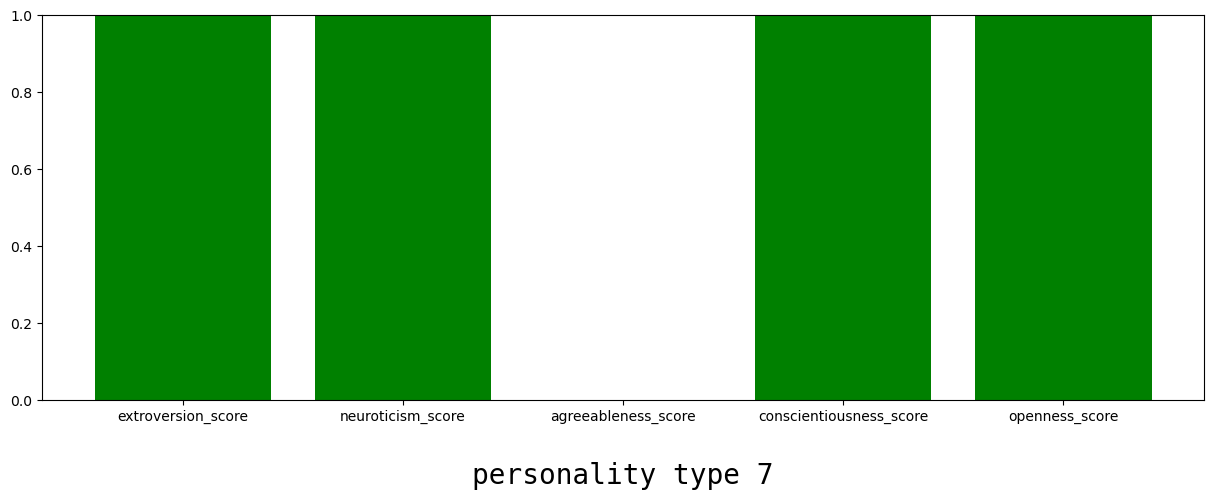

In [21]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['seven'].keys()), normalized_all_types_scores['seven'].values(), color='g')
plt.xlabel('\npersonality type 7', fontdict=font1)
plt.savefig("personality type 7.jpg")
plt.show()

### Personality Type 8 

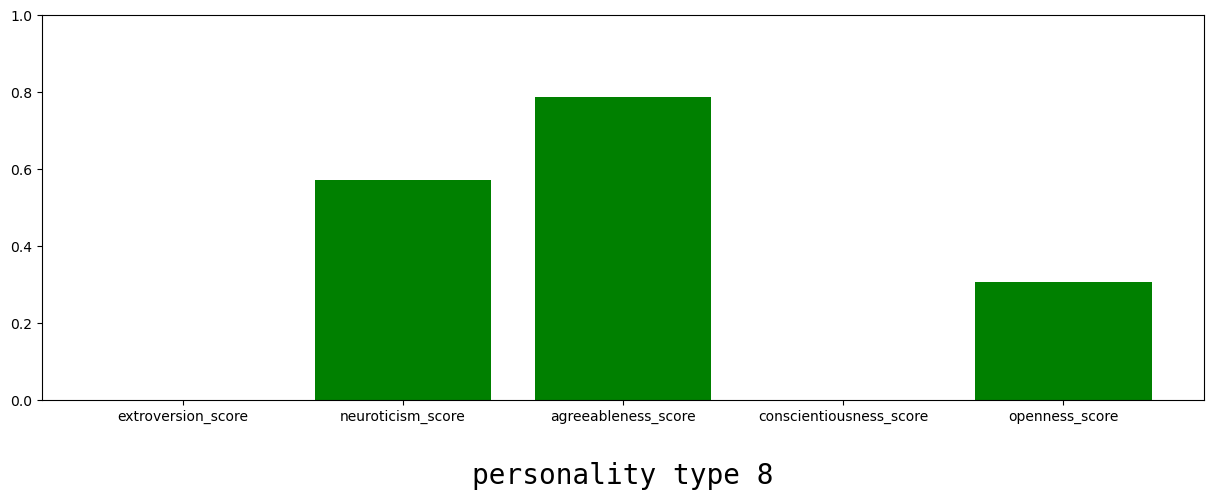

In [22]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['eight'].keys()), normalized_all_types_scores['eight'].values(), color='g')
plt.xlabel('\npersonality type 8', fontdict=font1)
plt.savefig("personality type 8.jpg")
plt.show()


### Personality Type 9 

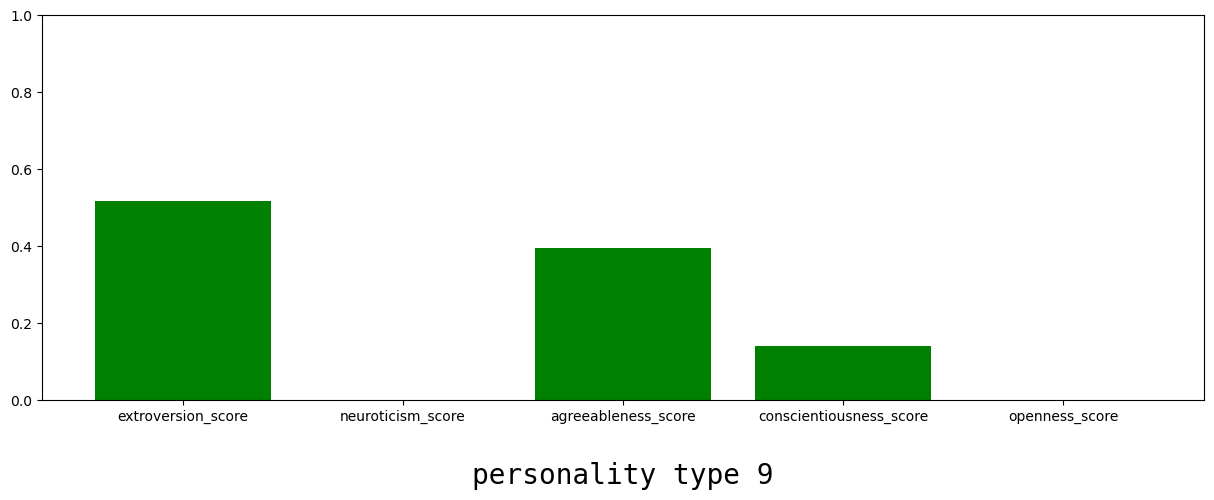

In [23]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['nine'].keys()), normalized_all_types_scores['nine'].values(), color='g')
plt.xlabel('\npersonality type 9', fontdict=font1)
plt.savefig("personality type 9.jpg")
plt.show()

### Personality Type 10

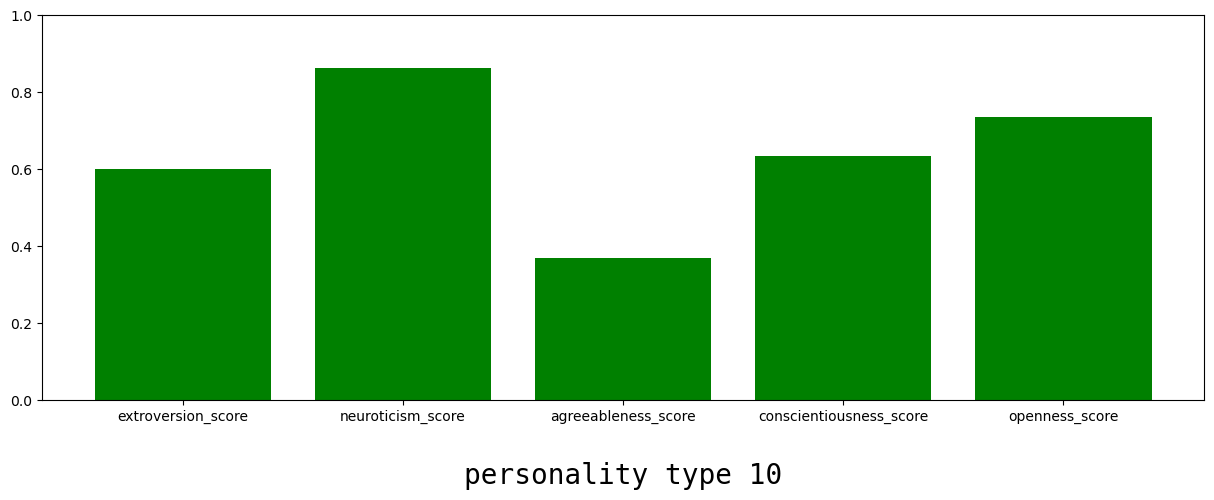

In [24]:
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['ten'].keys()), normalized_all_types_scores['ten'].values(), color='g')
plt.xlabel('\npersonality type 10', fontdict=font1)
plt.savefig("personality type 10.jpg", dpi = 100)
plt.show()